第一题

第二题

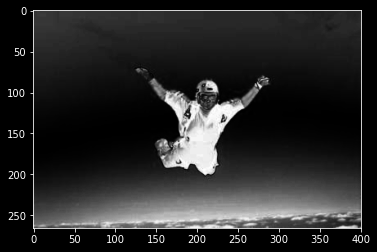

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("im1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(img,(7,7), 0.5)
gray_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

l_mean = np.mean(gray_lab[:,:,0])
a_mean = np.mean(gray_lab[:,:,1])
b_mean = np.mean(gray_lab[:,:,2])
lab = np.square(gray_lab- np.array([l_mean, a_mean, b_mean]))
lab = np.sum(lab,axis=2)
lab = lab/np.max(lab)

plt.imshow(lab, cmap='gray')
plt.show()

[[ 70  70  70 ...  81  81  83]
 [ 70  70  70 ...  81  81  82]
 [ 70  70  70 ...  81  81  80]
 ...
 [244 240 231 ... 170 163 170]
 [215 211 205 ... 165 190 191]
 [205 201 196 ... 187 215 231]]
106.96976543603398


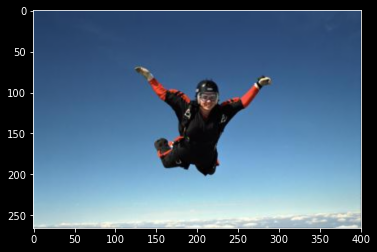

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#读取图片
img = cv2.imread('im1.jpg')
img_lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
m, n, w = img.shape#m行n列

#bgr 转化为 LAB
# img_lab= cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
img_L_mean = np.mean(np.mean(img_lab[:,:,0]))
print(img_lab[:,:,0])
img_a_mean = np.mean(np.mean(img_lab[:,:,1]))
img_b_mean = np.mean(np.mean(img_lab[:,:,2]))
print(img_b_mean)

#高斯滤波
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]

H = np.multiply(cv2.getGaussianKernel(7, 0.5), (cv2.getGaussianKernel(7, 0.5)).T)
img_R_blur = cv2.filter2D(img_R.astype('float32'), -1, H,borderType=cv2.BORDER_CONSTANT)
img_G_blur = cv2.filter2D(img_G.astype('float32'), -1, H,borderType=cv2.BORDER_CONSTANT)
img_B_blur = cv2.filter2D(img_B.astype('float32'), -1, H,borderType=cv2.BORDER_CONSTANT)

img_blur = cv2.merge([img_R_blur,img_G_blur,img_B_blur])

plt.imshow(img_blur.astype('uint8')) # 显示图片
# print(img_blur.astype('uint8')) 
img_lab_blur = cv2.cvtColor(img_blur, cv2.COLOR_RGB2LAB)




[[0.57428551 0.57428551 0.57428551 ... 0.57428551 0.57428551 0.57428551]
 [0.57428551 0.57428551 0.57428551 ... 0.57428551 0.57428551 0.57428551]
 [0.57428551 0.57428551 0.57428551 ... 0.57428551 0.57428551 0.57428551]
 ...
 [0.57428551 0.57428551 0.57428551 ... 0.57428551 0.57428551 0.57428551]
 [0.57428551 0.57428551 0.57428551 ... 0.57428551 0.57428551 0.57428551]
 [0.57428551 0.57428551 0.57428551 ... 0.57428551 0.57428551 0.57428551]]


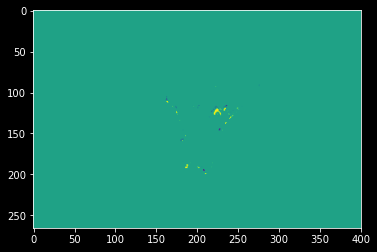

In [9]:
#计算显著图
Sd = np.zeros([m,n])
for i in range(m):
    for j in range(n):
       Sd[i,j] = np.sqrt((img_L_mean - img_lab_blur[i,j,0])**2 + (img_a_mean - img_lab_blur[i,j,1])**2 + (img_b_mean -img_lab_blur[i,j,2])**2)
plt.imshow(Sd)
#归一化
# 归一化子函数
def normalization(data):
    
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
Sd_normalized = normalization(Sd) #调用归一化子函数
print(Sd_normalized)
# cv2.imwrite(Sd_normalized,'FT_saliency.jpg')
# plt.imshow(Sd_normalized) # 显示图片